<a href="https://colab.research.google.com/github/ShubhJaroria/MNIST-with-FNN/blob/main/FNN_for_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
#plt.imshow(x_train[image_index], cmap='Greys')

UsageError: unrecognized arguments: # Only use this if using iPython


In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 39s 25ms/step - loss: 0.0212 - accuracy: 0.9927 - val_loss: 0.0079 - val_accuracy: 0.9977
Epoch 2/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.0099 - val_accuracy: 0.9962
Epoch 3/10
1500/1500 [==============================] - 37s 24ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0195 - val_accuracy: 0.9945
Epoch 4/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0155 - accuracy: 0.9946 - val_loss: 0.0136 - val_accuracy: 0.9958
Epoch 5/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0264 - val_accuracy: 0.9915
Epoch 6/10
1500/1500 [==============================] - 37s 24ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0223 - val_accuracy: 0.9937
Epoch 7/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0125 - accuracy: 0.9956 - val_loss: 0.0258 -

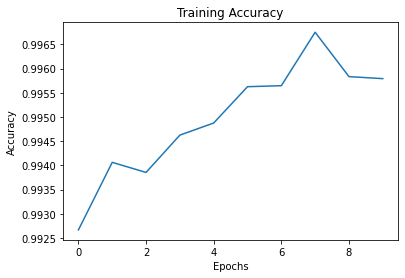

<Figure size 432x288 with 0 Axes>

In [11]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()
plt.clf()


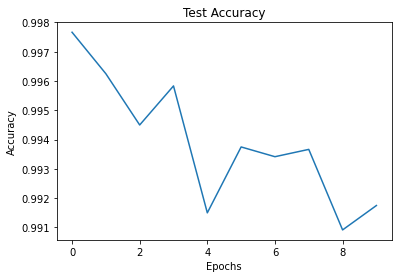

AttributeError: ignored

In [12]:
plt.plot(history.history['val_accuracy'])
plt.title('Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()
plt.clf()